**Seattle Airbnb DataAnalysis<br>
by Girish Kumar**

Importing required libraries for the task

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Exploration

In [44]:
listing_data = "/content/drive/MyDrive/listings.csv"
df_ld = pd.read_csv(listing_data)



*   Data from the .csv file is loaded and converted into a dataframe
*   path of the listing data is taken as a variable listing_data and
    data from this path is loaded into a dataframe.




In [45]:
df_ld.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


head() gives an overview of the data that we are working with.

In [46]:
df_ld.shape

(3818, 92)

(3818, 92) it means there are 3818 entries or rows along with 92 attributes or columns.

In [47]:
df_ld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

In [48]:
(df_ld.select_dtypes(include=['int64', 'float64'])).describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000




*   In the above code snippet we include only numeric data.
*   describe() provides a statistical overview of the data.



# Data Cleaning

In [49]:
#Checking for columns having atleast one Missing Value
(df_ld.isnull().sum()[df_ld.isnull().sum() > 0]).sort_values(ascending=False)

license                        3818
square_feet                    3721
monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
last_review                     627
first_review                    627
reviews_per_month               627
space                           569
host_response_rate              523
host_response_time              523
neighbourhood                   416
xl_picture_url                  320
medium_url                      320
thumbnail_url               

In [50]:
listings_miss = pd.DataFrame((df_ld.isnull().sum())*100/len(df_ld), columns=['Missing_Values'])
listings_miss[listings_miss['Missing_Values']>75]

,Missing_Values
square_feet,97.459403
license,100.000000


According to the above observation we can clearly notice that the percentage<br>
of null values are greater than 75 in both square_feet and license attributes.<br>
so, it is ideal to drop them.

In [51]:
C_miss = ['square_feet','license']
for i in C_miss:
    df_ld = df_ld.drop(columns=[i])

In [52]:
#Remove redundent columns
df_ld = df_ld.drop('scrape_id', axis=1)

In [53]:
listings_miss[listings_miss['Missing_Values']>20]

,Missing_Values
neighborhood_overview,27.029859
notes,42.063908
transit,24.463070
host_about,22.498690
host_acceptance_rate,20.246202
square_feet,97.459403
weekly_price,47.380828
monthly_price,60.267156
security_deposit,51.126244
cleaning_fee,26.977475


In [54]:
df_ld[['security_deposit','weekly_price','cleaning_fee','monthly_price','price']]

,security_deposit,weekly_price,cleaning_fee,monthly_price,price
0,NaN,NaN,NaN,NaN,$85.00
1,$100.00,"$1,000.00",$40.00,"$3,000.00",$150.00
2,"$1,000.00",NaN,$300.00,NaN,$975.00
3,NaN,$650.00,NaN,"$2,300.00",$100.00
4,$700.00,NaN,$125.00,NaN,$450.00
...,...,...,...,...,...
3813,NaN,NaN,$230.00,NaN,$359.00
3814,$500.00,NaN,$50.00,NaN,$79.00
3815,$250.00,$450.00,$35.00,NaN,$93.00
3816,$300.00,NaN,$45.00,NaN,$99.00


From the Above dataframe we can see that there are many Nan values<br>
And also the price type columns are present as object type because of <br>
the currency character.<br>
so we will try to remove the currency character and also the replace the<br>
NaN values with '0' to avoid data inconsistencies.

In [55]:
import re
ld_price = ['security_deposit','weekly_price','cleaning_fee','monthly_price','price']
for i in ld_price:
    df_ld[i].fillna('0',inplace=True)
    df_ld[i] = df_ld[i].str.replace('$','')
    df_ld[i] = df_ld[i].str.replace(',','')
    df_ld[i] = df_ld[i].astype('float')

<ipython-input-55-6e83c819ece5>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_ld[i] = df_ld[i].str.replace('$','')


In [56]:
df_ld[['security_deposit','weekly_price','cleaning_fee','monthly_price','price']]

,security_deposit,weekly_price,cleaning_fee,monthly_price,price
0,0.0,0.0,0.0,0.0,85.0
1,100.0,1000.0,40.0,3000.0,150.0
2,1000.0,0.0,300.0,0.0,975.0
3,0.0,650.0,0.0,2300.0,100.0
4,700.0,0.0,125.0,0.0,450.0
...,...,...,...,...,...
3813,0.0,0.0,230.0,0.0,359.0
3814,500.0,0.0,50.0,0.0,79.0
3815,250.0,450.0,35.0,0.0,93.0
3816,300.0,0.0,45.0,0.0,99.0


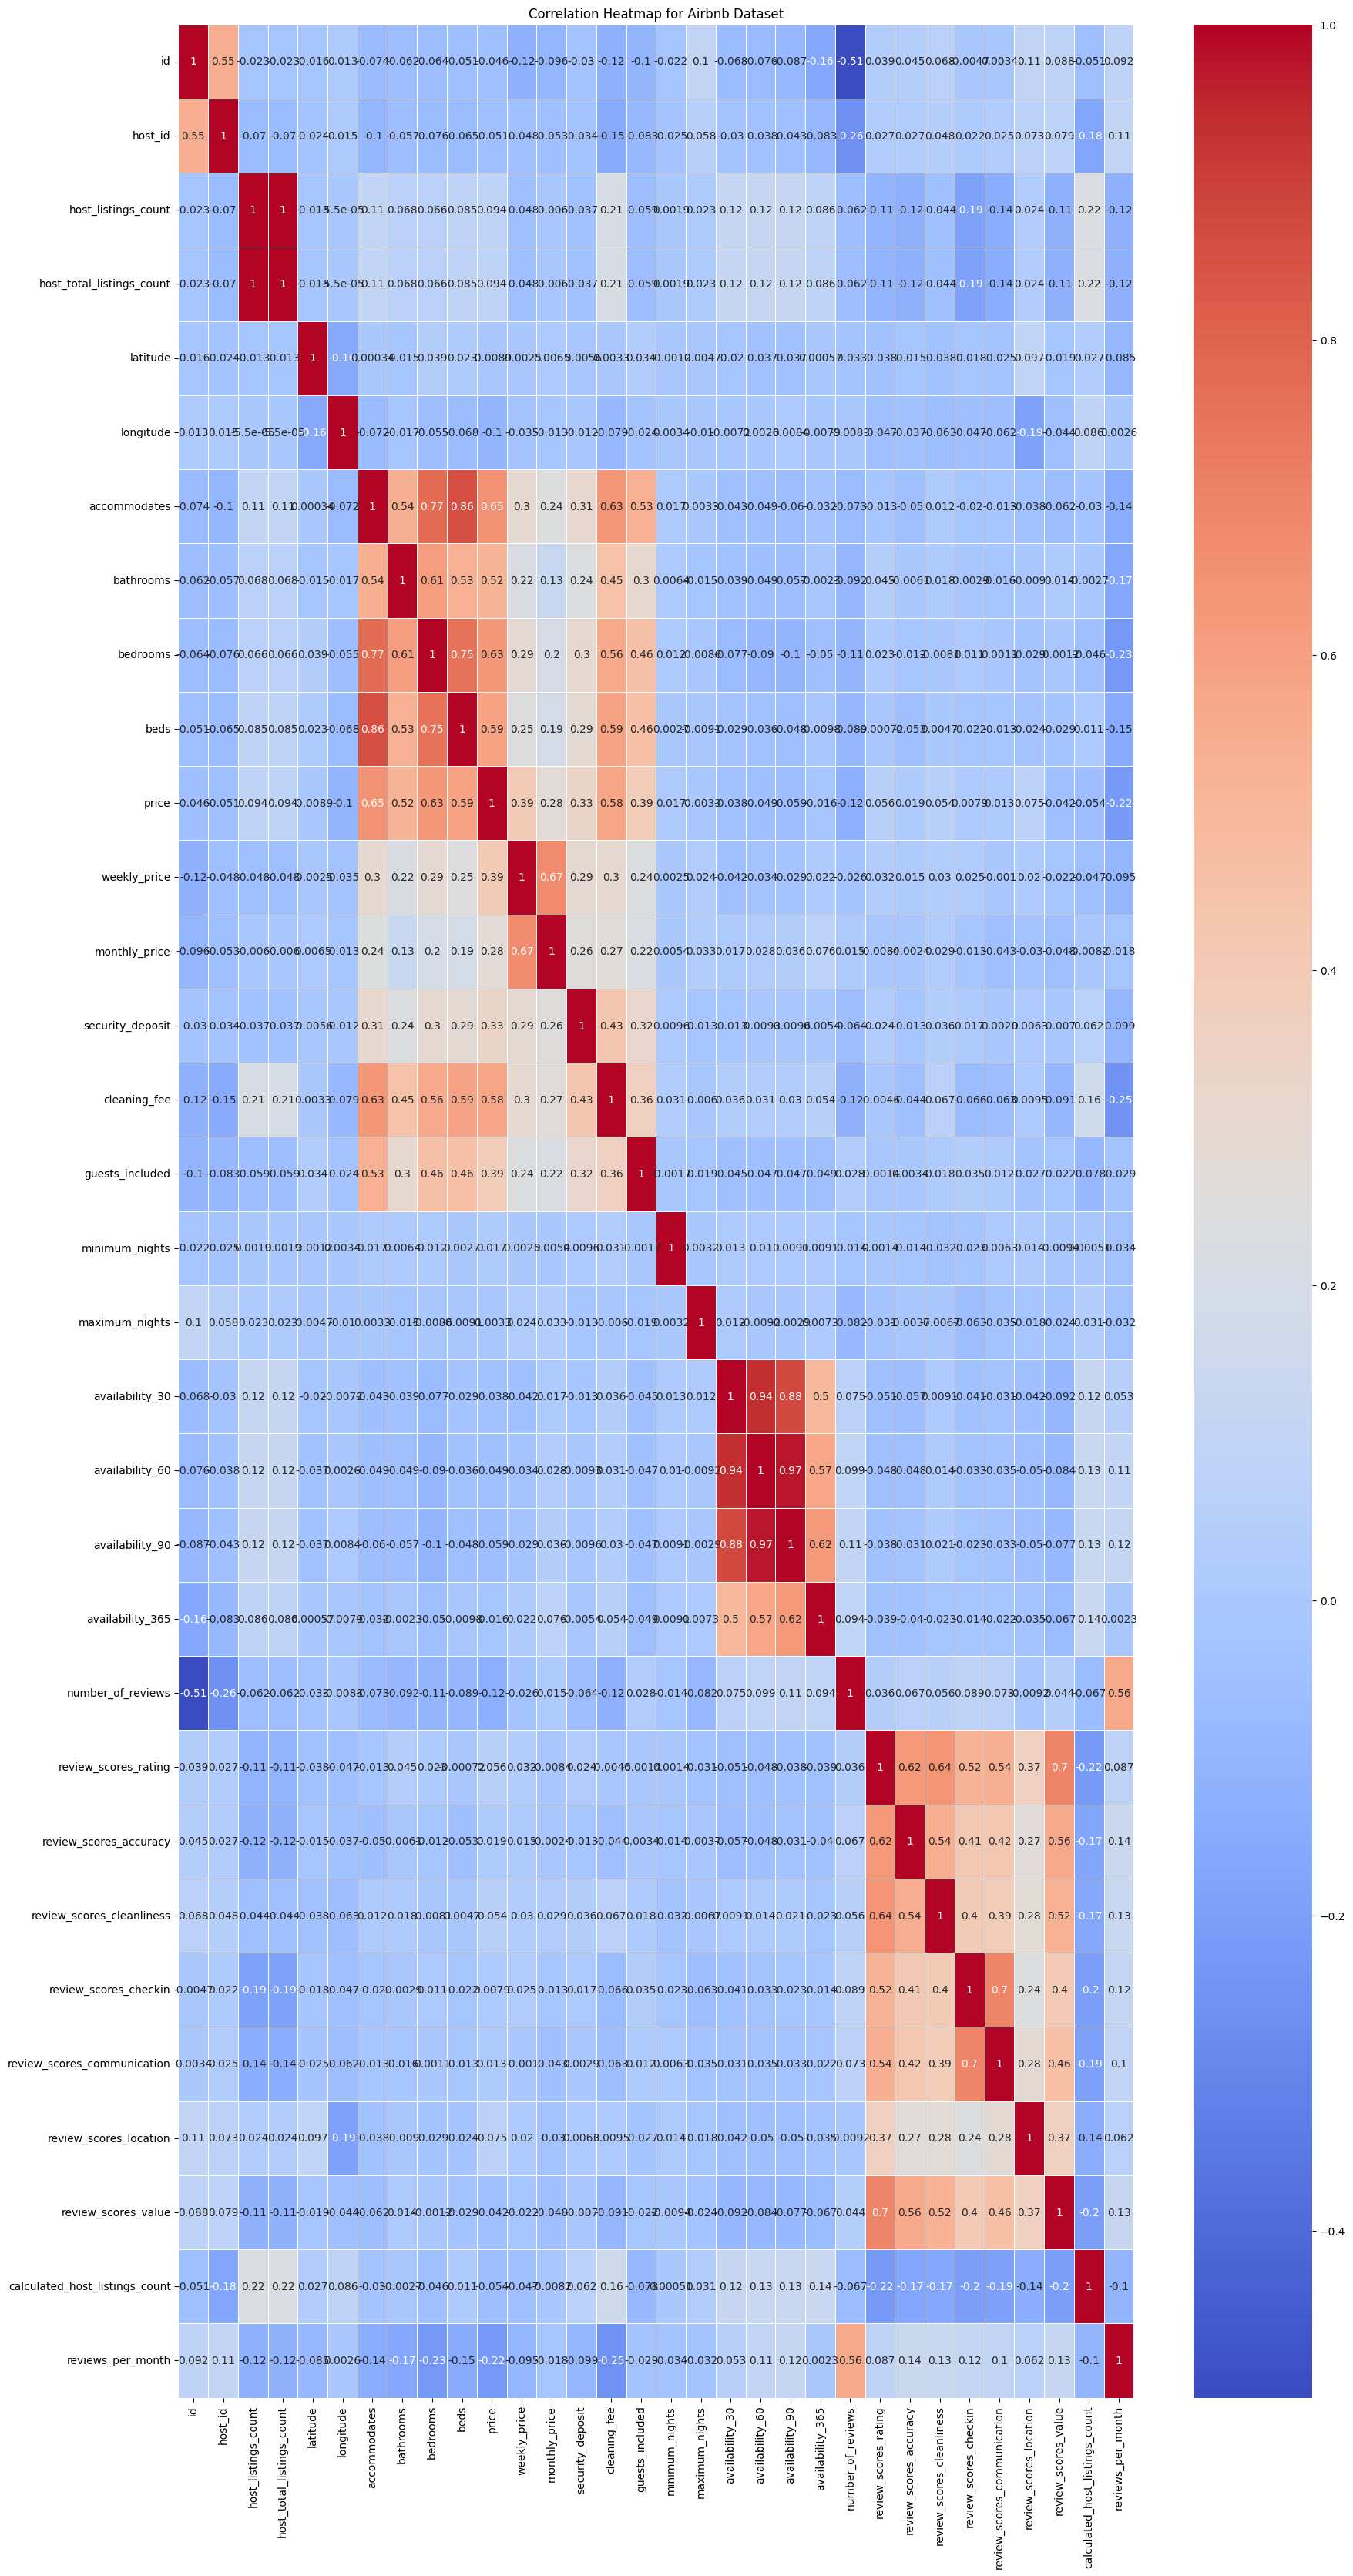

In [57]:
# Select numeric columns for correlation analysis
numeric_columns = df_ld.select_dtypes(include=['int64', 'float64'])

# Calculate the correlation matrix
corr_mat = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(20,40))  # Adjust the figure size as needed
sns.heatmap(corr_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for Airbnb Dataset')
plt.show()

from the above correlation matrix we can observe that the listing price<br>
is influenced or effected by number of bed,bedrooms,bathrooms and accomadates..etc <br>
we can also see that the number of reviews doesnot actually effect the increase and decrease in prices.


# Visualization

In [58]:
# Group the data by neighborhood and calculate the mean price
mean_price_by_neighb = df_ld.groupby('neighbourhood')['price'].mean()
mean_price_by_neighb.sort_values(ascending=False)

neighbourhood
Fairmount Park         370.000000
Industrial District    245.000000
Portage Bay            241.428571
Westlake               197.000000
Alki                   196.652174
                          ...    
Georgetown              77.000000
Rainier Beach           76.722222
Dunlap                  75.461538
Olympic Hills           63.666667
Roxhill                 60.000000
Name: price, Length: 81, dtype: float64

Shows the average prices of the rooms <br>
According to the neighbourhood.

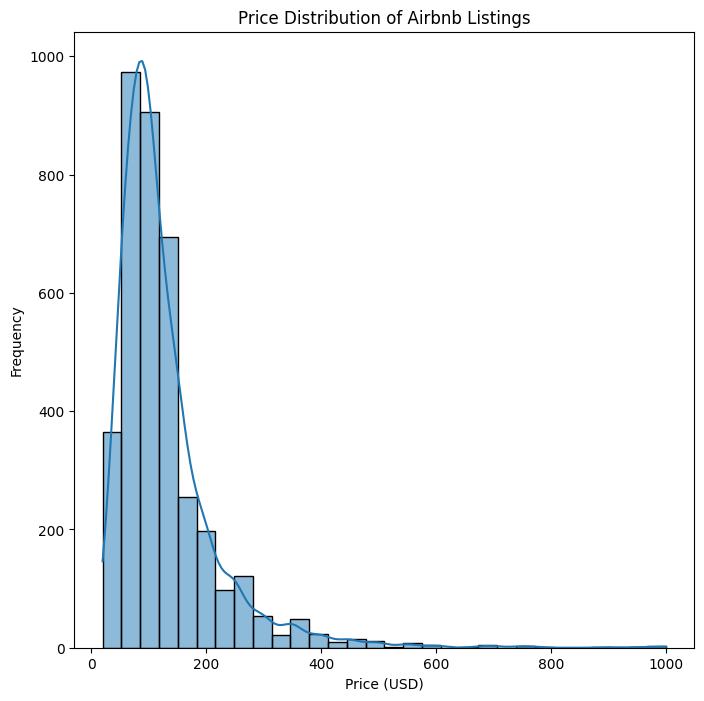

In [59]:
# Price Distribution
plt.figure(figsize=(8, 8))
sns.histplot(data=df_ld, x='price', bins=30, kde=True)
plt.title('Price Distribution of Airbnb Listings')
plt.xlabel('Price (USD)')
plt.ylabel('Frequency')
plt.show()

the Above analysis shows that more number of bookings taken place<br>
between 60 to 200 dollars.

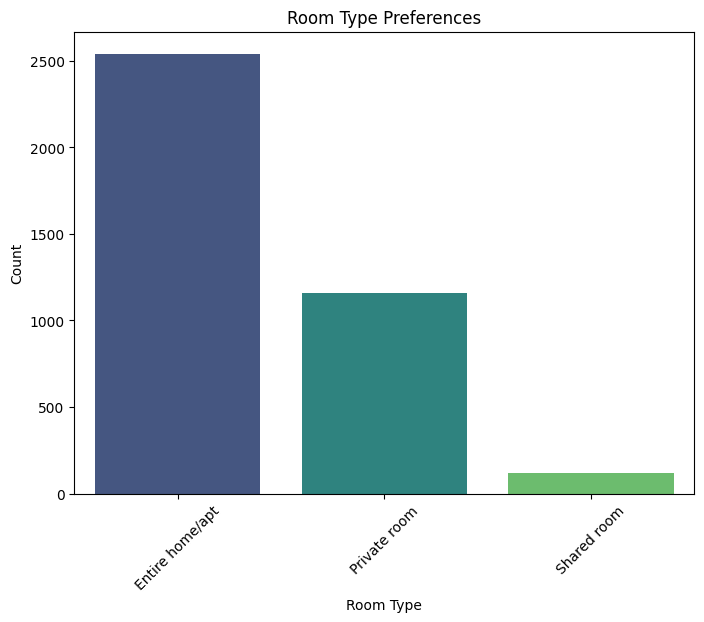

In [60]:
# Room Type Preferences
plt.figure(figsize=(8, 6))
sns.countplot(data=df_ld, x='room_type', palette='viridis')
plt.title('Room Type Preferences')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

it shows that more number of booking preferences are for<br>
Entire home/apartment compared to private room or shared room.

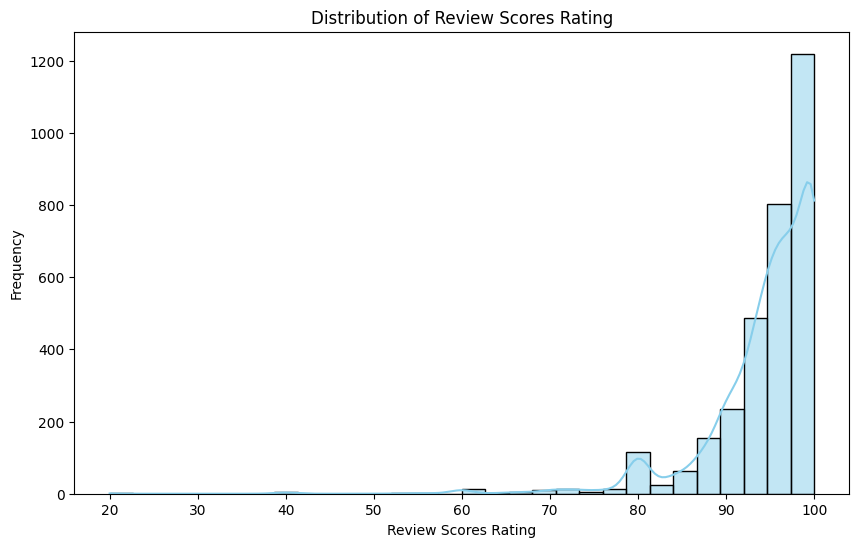

In [61]:
#Histogram of review_scores_rating
plt.figure(figsize=(10, 6))
sns.histplot(data=df_ld, x='review_scores_rating', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Review Scores Rating')
plt.xlabel('Review Scores Rating')
plt.ylabel('Frequency')
plt.show()

more number of ratings are greater than 8.5 or 85%



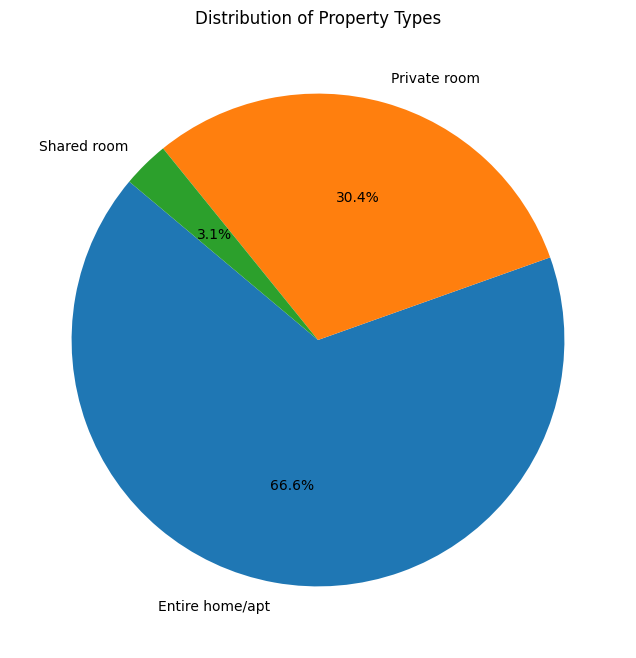

In [62]:
# Calculate the distribution of property types
property_type_counts = df_ld['room_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Property Types')
plt.show()

The above visual shows the property distribution in seattle region.<br>
66.6% of property is Entire home/apt,30.4% private room,3.1% shared rooms

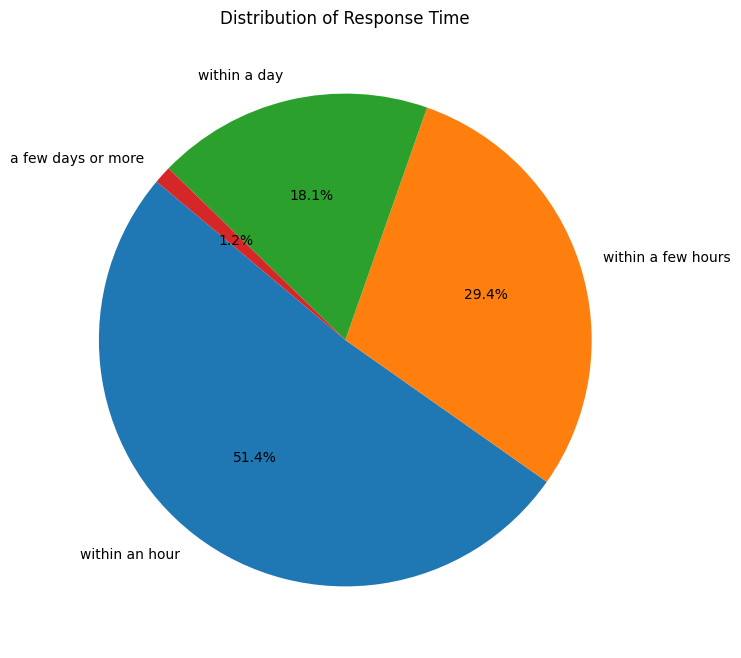

In [63]:
# Calculate the distribution of response time
property_type_counts = df_ld['host_response_time'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Response Time')
plt.show()

The above visual shows the time distribution in which the responses are recieved.<br>
within an hour 51.4%,within a few hours 29.4%,within a day 18.1%,A few days or more 1.2% .

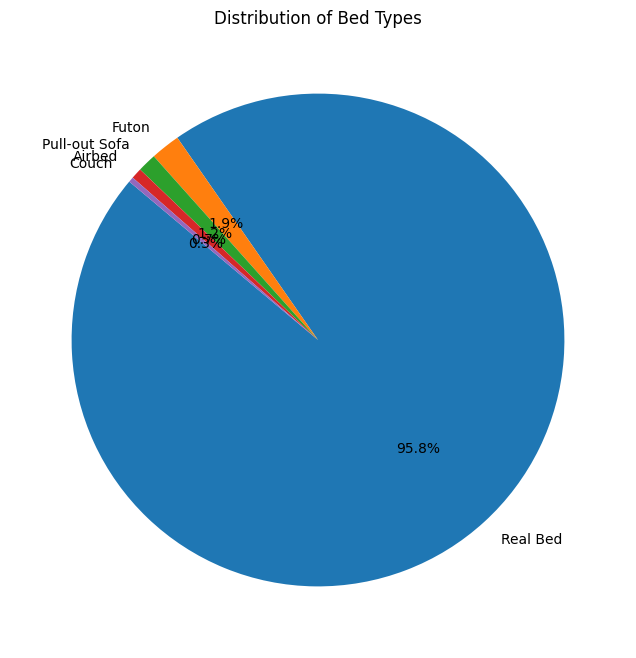

In [64]:
# Calculate the distribution of bed types
property_type_counts = df_ld['bed_type'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(property_type_counts, labels=property_type_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Bed Types')
plt.show()



The above visual shows the pie chart in which distribution of bed Type preferences are shown.<br>
Real bed as preference 95.8%,couch 0.3%,Airbed 0.7%,Pull-out sofa 1.2%,futon 1.9%.


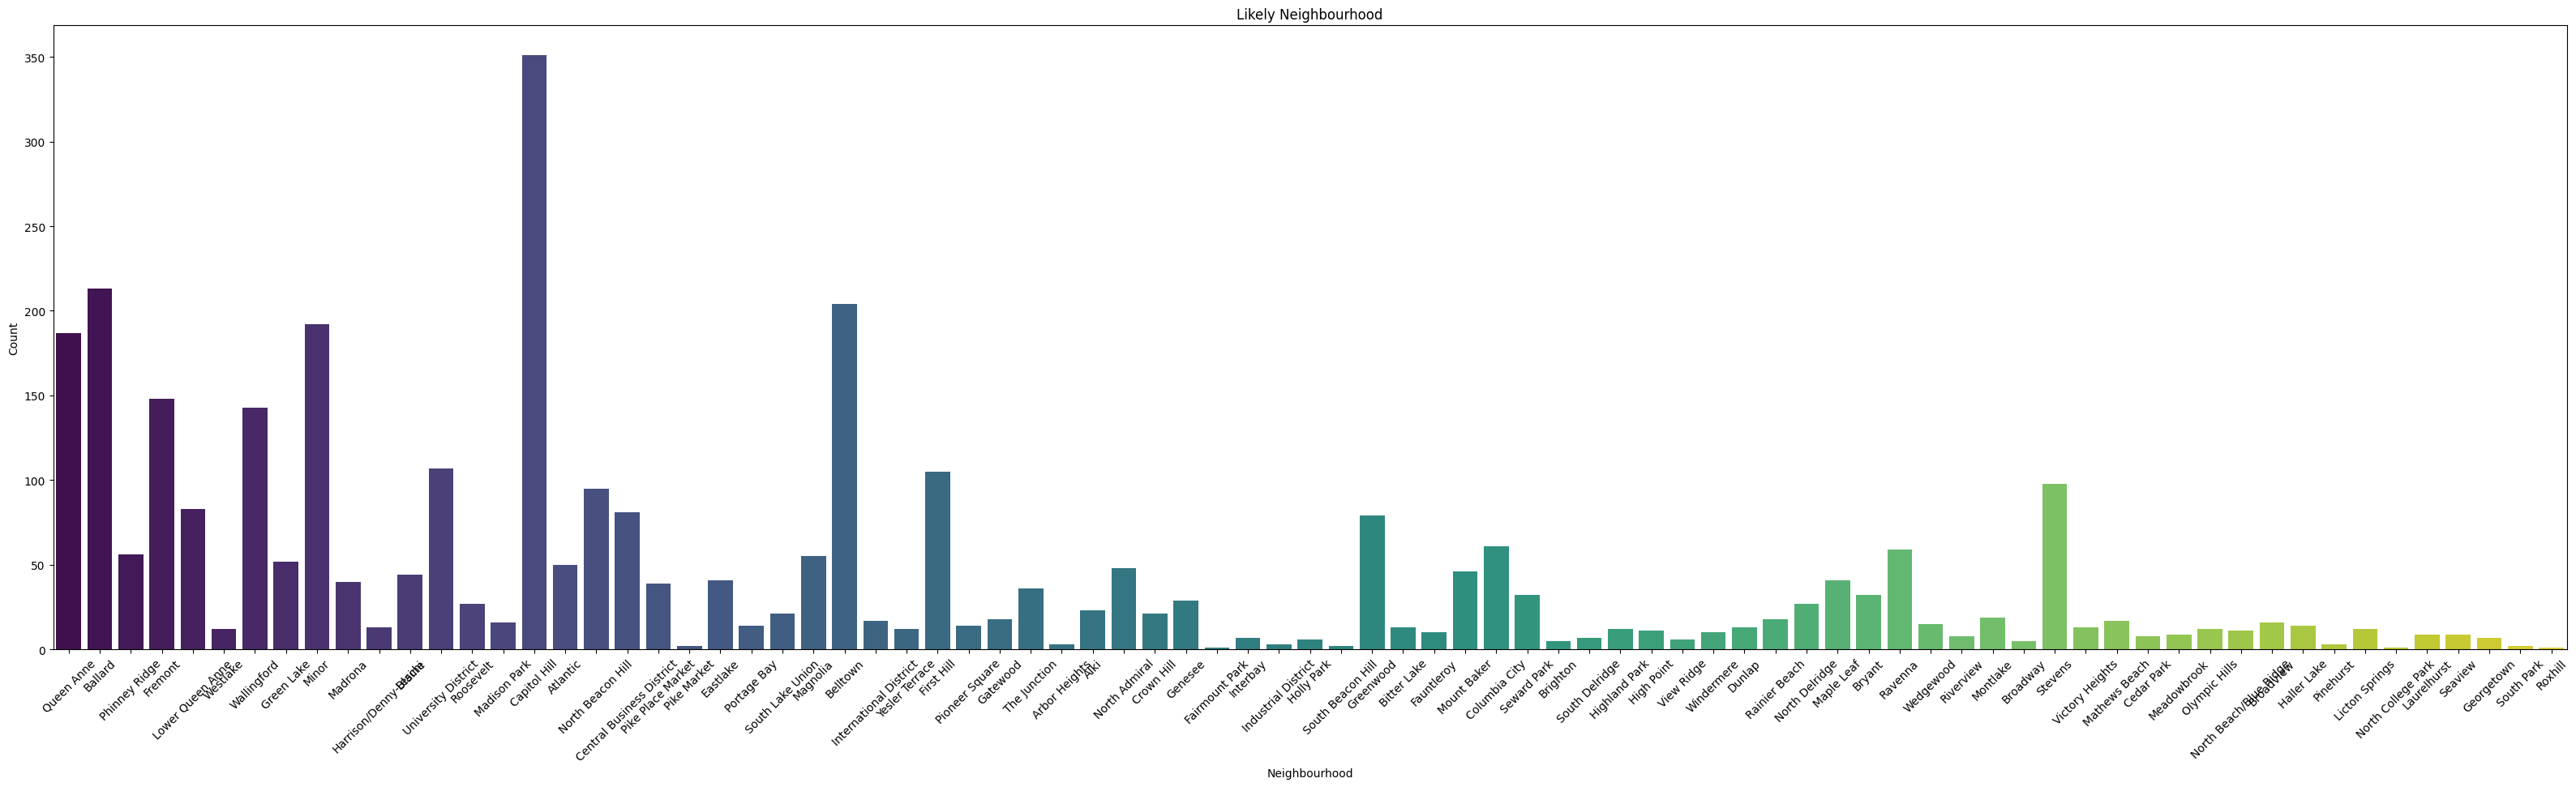

In [65]:
# Neighbourhood Preferences
plt.figure(figsize=(40, 10))
sns.countplot(data=df_ld, x='neighbourhood', palette='viridis')
plt.title('Likely Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

From the above visual we can see that the most popular neighbourhood for <br>
bookings is Capital hill and then Ballard,Belltown etc.